In [234]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

# CSV 파일 리스트 불러오기
csv_files = sorted(glob.glob("../saved/submit/*.csv"))

# 파일 리스트 확인
for i, f in enumerate(csv_files):
    print(f"[{i}] {f}")


[0] ../saved/submit\20251210_232743_DeepFM_Enhanced.csv
[1] ../saved/submit\20251210_233937_DeepFM_Enhanced.csv
[2] ../saved/submit\20251211_171902_DeepFM_Enhanced.csv
[3] ../saved/submit\20251211_173201_DeepFM_Enhanced.csv
[4] ../saved/submit\20251211_180639_DeepFM_Enhanced.csv
[5] ../saved/submit\DCN_baseline.csv
[6] ../saved/submit\DeepFM_baseline.csv
[7] ../saved/submit\FFM_baseline.csv
[8] ../saved/submit\FM_baseline.csv
[9] ../saved/submit\Image_DeepFM_baseline.csv
[10] ../saved/submit\Image_FM_baseline.csv
[11] ../saved/submit\NCF_baseline.csv
[12] ../saved/submit\ResNet_DeepFM_baseline.csv
[13] ../saved/submit\Text_DeepFM_baseline.csv
[14] ../saved/submit\Text_FM_baseline.csv
[15] ../saved/submit\WDN_baseline.csv
[16] ../saved/submit\dg1.csv
[17] ../saved/submit\dg2.csv
[18] ../saved/submit\jy.csv
[19] ../saved/submit\output (1).csv
[20] ../saved/submit\second.csv
[21] ../saved/submit\team_best.csv
[22] ../saved/submit\third.csv


In [285]:
idx1 = 1  # 예시
idx2 = 4

file1 = csv_files[idx1]
file2 = csv_files[idx2]

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

model1 = os.path.basename(file1).replace(".csv","")
model2 = os.path.basename(file2).replace(".csv","")

df1["model"] = model1
df2["model"] = model2

df1.head(), df2.head()


(   user_id        isbn    rating                            model
 0    11676  0002005018  7.028572  20251210_233937_DeepFM_Enhanced
 1   116866  0002005018  7.402831  20251210_233937_DeepFM_Enhanced
 2   152827  0060973129  8.039620  20251210_233937_DeepFM_Enhanced
 3   157969  0374157065  8.030252  20251210_233937_DeepFM_Enhanced
 4    67958  0399135782  8.326527  20251210_233937_DeepFM_Enhanced,
    user_id        isbn    rating                            model
 0    11676  0002005018  5.811826  20251211_180639_DeepFM_Enhanced
 1   116866  0002005018  7.136770  20251211_180639_DeepFM_Enhanced
 2   152827  0060973129  8.021493  20251211_180639_DeepFM_Enhanced
 3   157969  0374157065  7.980752  20251211_180639_DeepFM_Enhanced
 4    67958  0399135782  8.228064  20251211_180639_DeepFM_Enhanced)

In [286]:
# 두 파일을 하나로 합치기
combined = pd.concat([df1, df2], ignore_index=True)

# wide 형태로 변환해서 두 모델의 rating을 같은 행에 놓기
pivot_df = combined.pivot_table(
    index=["user_id", "isbn"],
    columns="model",
    values="rating"
).reset_index()

pivot_df.head()



model,user_id,isbn,20251210_233937_DeepFM_Enhanced,20251211_180639_DeepFM_Enhanced
0,14,0689821166,7.178950,6.695191
1,17,0425099148,3.527782,3.619628
2,17,0891075275,3.004319,3.183840
3,51,0440225701,7.150192,6.939356
4,53,0060914068,9.798841,9.462206


In [287]:
pivot_df["diff"] = pivot_df[model1] - pivot_df[model2]

# 차이가 있는 행만 추출
diff_rows = pivot_df[pivot_df["diff"] != 0]
diff_rows.head()


model,user_id,isbn,20251210_233937_DeepFM_Enhanced,20251211_180639_DeepFM_Enhanced,diff
0,14,0689821166,7.178950,6.695191,0.483759
1,17,0425099148,3.527782,3.619628,-0.091846
2,17,0891075275,3.004319,3.183840,-0.179521
3,51,0440225701,7.150192,6.939356,0.210836
4,53,0060914068,9.798841,9.462206,0.336635


In [288]:
# 전체 통계
pivot_df[[model1, model2, "diff"]].describe()


model,20251210_233937_DeepFM_Enhanced,20251211_180639_DeepFM_Enhanced,diff
count,76699.000000,76699.000000,76699.000000
mean,7.140140,7.120360,0.019780
std,1.373788,1.526385,0.448178
min,1.000000,1.000000,-2.439853
25%,6.915887,6.855811,-0.200839
50%,7.164921,7.191472,-0.006082
75%,7.859747,7.982489,0.172856
max,10.000000,10.000000,3.854645


In [289]:
pivot_df[[model1, model2]].corr()


model,20251210_233937_DeepFM_Enhanced,20251211_180639_DeepFM_Enhanced
model,,
20251210_233937_DeepFM_Enhanced,1.000000,0.957658
20251211_180639_DeepFM_Enhanced,0.957658,1.000000


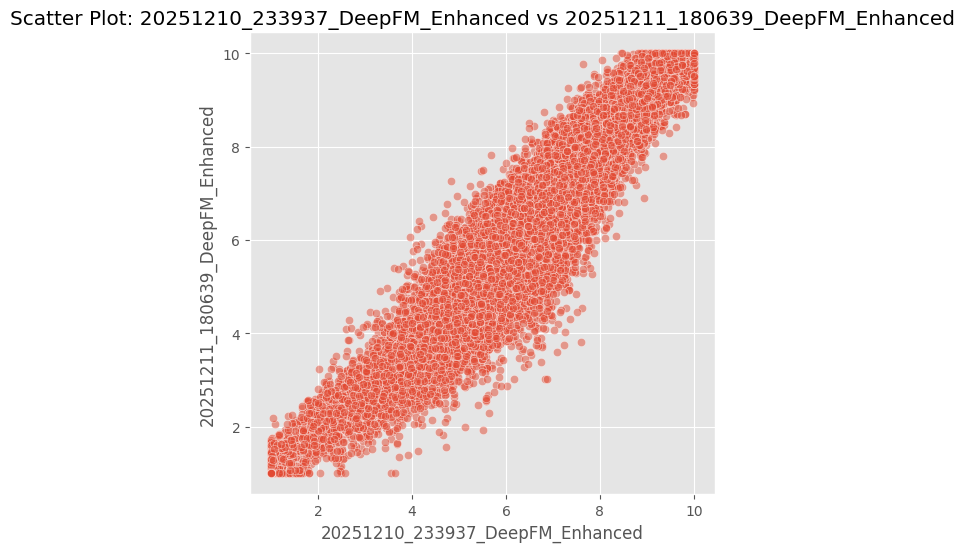

In [290]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=pivot_df[model1], y=pivot_df[model2], alpha=0.5)
plt.xlabel(model1)
plt.ylabel(model2)
plt.title(f"Scatter Plot: {model1} vs {model2}")
plt.show()


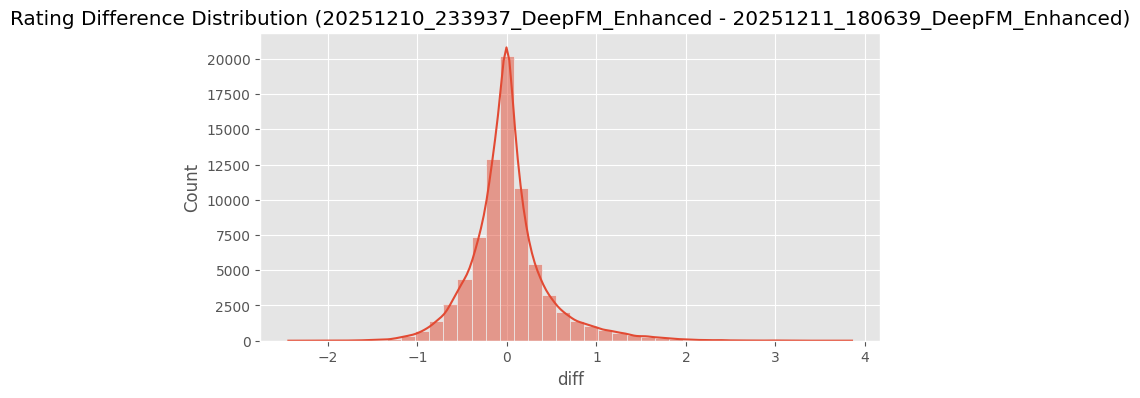

In [291]:
plt.figure(figsize=(8,4))
sns.histplot(pivot_df["diff"], kde=True, bins=40)
plt.title(f"Rating Difference Distribution ({model1} - {model2})")
plt.show()


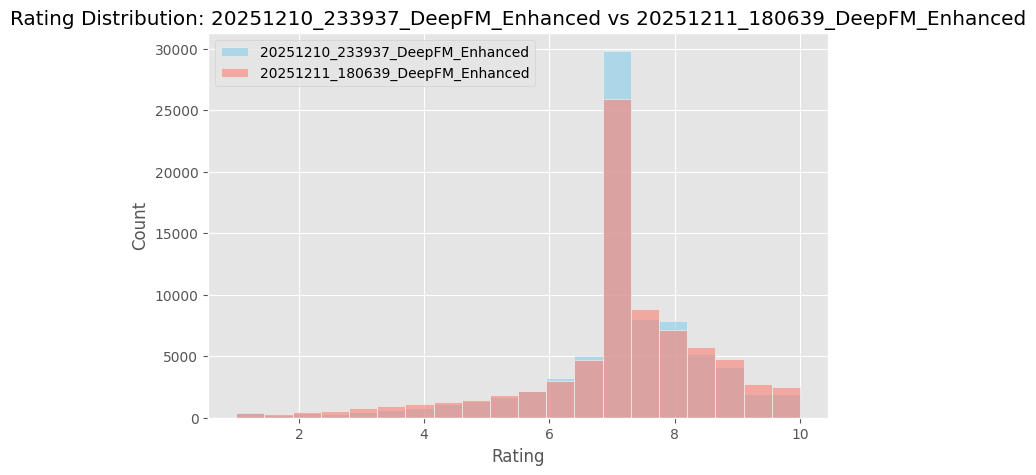

In [292]:
plt.figure(figsize=(8,5))

# sns.histplot을 이용한 겹친 히스토그램
sns.histplot(pivot_df[model1], color="skyblue", label=model1, bins=20, alpha=0.6)
sns.histplot(pivot_df[model2], color="salmon", label=model2, bins=20, alpha=0.6)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title(f"Rating Distribution: {model1} vs {model2}")
plt.legend()
plt.show()


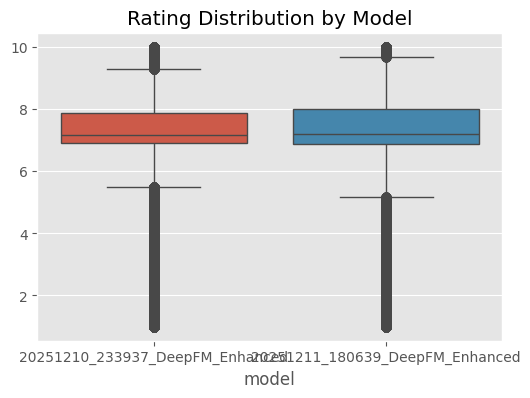

In [293]:
plt.figure(figsize=(6,4))
sns.boxplot(data=pivot_df[[model1, model2]])
plt.title("Rating Distribution by Model")
plt.show()


In [294]:
top_diff = diff_rows.sort_values("diff", key=abs, ascending=False).head(20)
top_diff


model,user_id,isbn,20251210_233937_DeepFM_Enhanced,20251211_180639_DeepFM_Enhanced,diff
3546,11676,0679745203,6.868616,3.013971,3.854645
3295,11676,0452282829,6.834222,3.018527,3.815694
2822,11676,0156027321,7.603547,3.816689,3.786858
3778,11676,0886778913,5.515690,1.928460,3.587230
3314,11676,0515128015,7.232950,3.746984,3.485966
3184,11676,0446343455,7.079210,3.609319,3.469892
3395,11676,0553382411,6.751543,3.385076,3.366467
55203,195904,0140244824,5.645185,2.305536,3.339649
3182,11676,0441627404,7.266046,4.027131,3.238916
3054,11676,0393049272,4.729669,1.570510,3.159159
